# Import Package

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [5]:
df_rm = pd.read_csv('[BRI] Regression Training.csv', low_memory = False)

In [6]:
df_rm.head()

,Index,Year of Service,Q2 20 SC,Q2_Incentive,Grade,TOTAL REV_Jul20,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH
0,1,9,2.4600,8.786319e+07,11,8.794014e+08,4.832649,-0.346644,0.0,0.485597,750455620.8,0.26
1,2,10,3.2550,7.898679e+07,12,8.192389e+08,2.355982,-21.088729,0.5,0.712338,427931769.8,0.74
2,3,5,1.7825,2.166796e+07,11,7.793109e+08,0.907896,8.469858,0.0,0.723232,469477058.6,1.86
3,4,4,1.7875,1.398703e+08,12,2.084217e+09,4.331416,-9.162848,1.0,0.562074,824765897.9,0.97
4,5,8,1.9825,1.440724e+07,11,6.514022e+08,0.393369,11.763723,0.0,0.460099,426004328.0,1.14


In [7]:
df_rm.shape

(144, 12)

# EDA

In [8]:
df_rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Index                         144 non-null    int64  
 1   Year of Service               144 non-null    int64  
 2   Q2 20 SC                      144 non-null    float64
 3   Q2_Incentive                  144 non-null    float64
 4   Grade                         144 non-null    int64  
 5   TOTAL REV_Jul20               144 non-null    float64
 6   Q2 20WM Revenue % Ach         144 non-null    float64
 7   Q2 20CASA Growth % Ach        144 non-null    float64
 8   TOTAL NQC/NTB %Ach_Jul20      144 non-null    float64
 9   TOTAL Mob_Banking %Ach_Jul20  144 non-null    float64
 10  Jul20_WM                      144 non-null    float64
 11  Jul20_CS ACH                  144 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 13.6 KB


In [9]:
df_rm['Index'] = df_rm['Index'].astype(str)

In [10]:
df_rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Index                         144 non-null    object 
 1   Year of Service               144 non-null    int64  
 2   Q2 20 SC                      144 non-null    float64
 3   Q2_Incentive                  144 non-null    float64
 4   Grade                         144 non-null    int64  
 5   TOTAL REV_Jul20               144 non-null    float64
 6   Q2 20WM Revenue % Ach         144 non-null    float64
 7   Q2 20CASA Growth % Ach        144 non-null    float64
 8   TOTAL NQC/NTB %Ach_Jul20      144 non-null    float64
 9   TOTAL Mob_Banking %Ach_Jul20  144 non-null    float64
 10  Jul20_WM                      144 non-null    float64
 11  Jul20_CS ACH                  144 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 13.6+ KB


In [11]:
df_rm.isna().sum()

Index                           0
Year of Service                 0
Q2 20 SC                        0
Q2_Incentive                    0
Grade                           0
TOTAL REV_Jul20                 0
Q2 20WM Revenue % Ach           0
Q2 20CASA Growth % Ach          0
TOTAL NQC/NTB %Ach_Jul20        0
TOTAL Mob_Banking %Ach_Jul20    0
Jul20_WM                        0
Jul20_CS ACH                    0
dtype: int64

In [12]:
df_rm.dropna(inplace = True)

In [13]:
df_rm.columns

Index(['Index', 'Year of Service', 'Q2 20 SC ', 'Q2_Incentive', 'Grade',
       'TOTAL REV_Jul20', 'Q2 20WM Revenue % Ach', 'Q2 20CASA Growth % Ach',
       'TOTAL NQC/NTB %Ach_Jul20', 'TOTAL Mob_Banking %Ach_Jul20', 'Jul20_WM',
       'Jul20_CS ACH'],
      dtype='object')

# Descriptive

In [14]:
#Cek apakah distribusi normal sehingga tidak perlu dilakukan adjustment data
def distributions(df):
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9,1, figsize=(8,18))
    sns.distplot(df['Q2 20WM Revenue % Ach'], ax=ax1)
    sns.distplot(df['Q2 20CASA Growth % Ach'], ax=ax2)
    sns.distplot(df["TOTAL NQC/NTB %Ach_Jul20"], ax=ax3)
    sns.distplot(df["TOTAL Mob_Banking %Ach_Jul20"], ax=ax4)
    sns.distplot(df["Year of Service"], ax=ax5)
    sns.distplot(df["Q2 20 SC "], ax=ax6)
    sns.distplot(df["Jul20_CS ACH"], ax=ax7)
    sns.distplot(df["Grade"], ax=ax8)
    sns.distplot(df["Jul20_WM"], ax=ax9)
    plt.tight_layout()

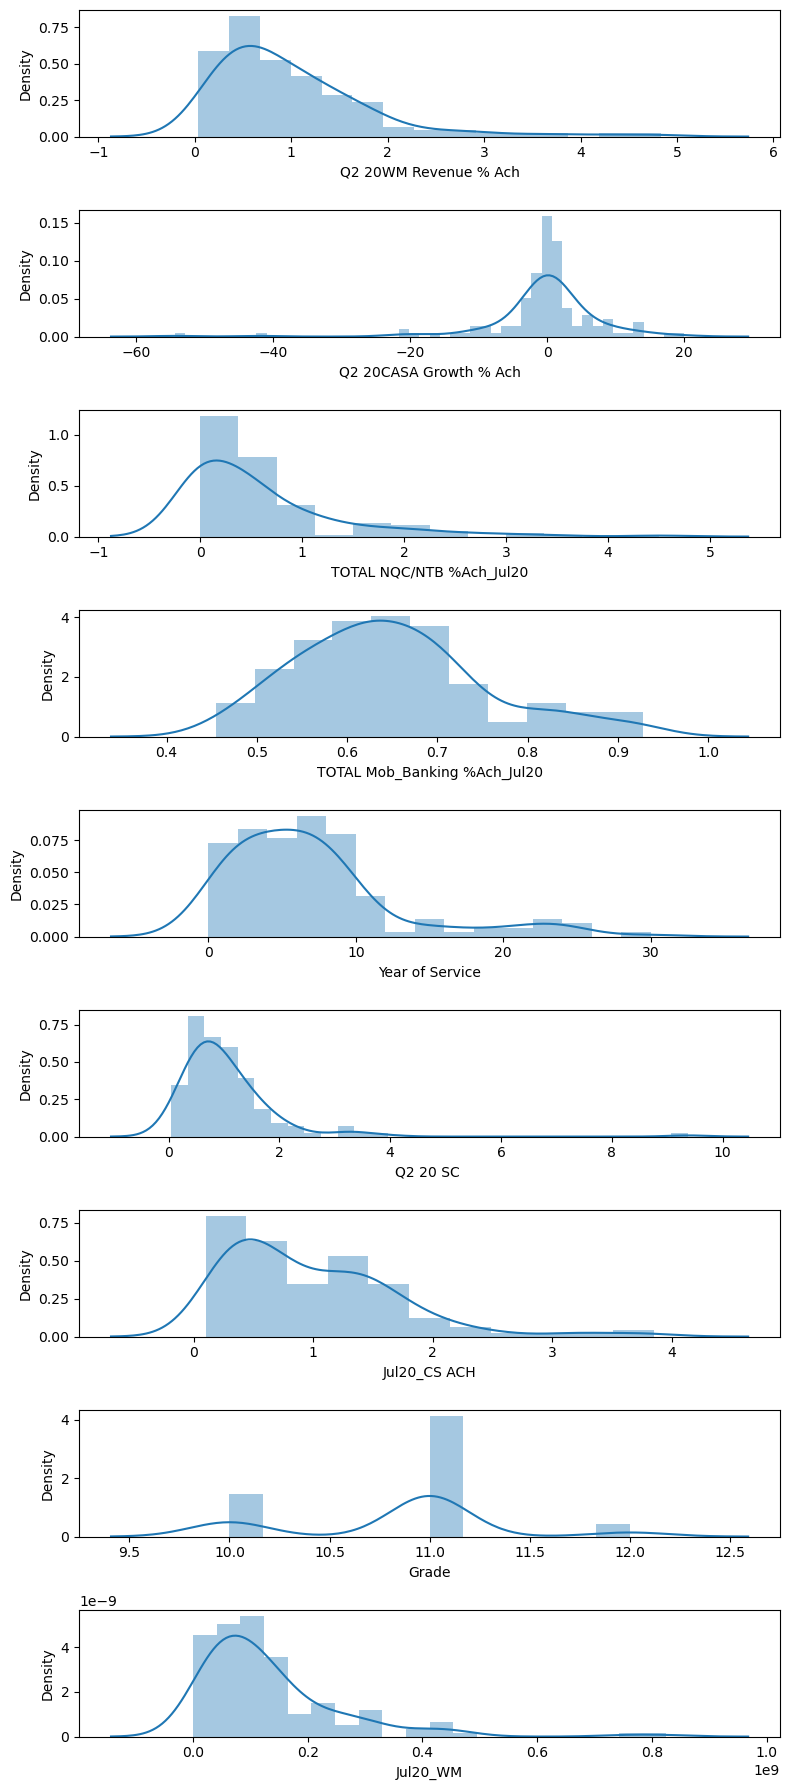

In [15]:
distributions(df_rm)

# Experiment #1: Clustering with data normalized by StandardScaller

## Data Preparation

In [16]:
grade = pd.get_dummies(df_rm.Grade, prefix='Grade')
grade.head()

,Grade_10,Grade_11,Grade_12
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


In [17]:
df_new = df_rm[['Year of Service', 'Q2 20 SC ', 'Q2 20WM Revenue % Ach', 'Q2 20CASA Growth % Ach',
       'TOTAL NQC/NTB %Ach_Jul20', 'TOTAL Mob_Banking %Ach_Jul20', "Jul20_WM", 'Jul20_CS ACH']]
sc=StandardScaler()
cluster_scaled = pd.DataFrame(sc.fit_transform(df_new))
cluster_scaled.columns=df_new.columns
cluster_scaled.head()

,Year of Service,Q2 20 SC,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH
0,0.347578,1.453310,4.718687,0.015799,-0.747235,-1.567081,4.810747,-1.014103
1,0.516101,2.271548,1.671304,-2.461408,-0.110538,0.606300,2.294883,-0.337882
2,-0.326513,0.756007,-0.110475,1.068745,-0.747235,0.710724,2.618959,1.239967
3,-0.495036,0.761153,4.101951,-1.037111,0.526159,-0.834020,5.390409,-0.013860
4,0.179055,0.961853,-0.743567,1.462128,-0.747235,-1.811481,2.279847,0.225635


## Elbow Curve

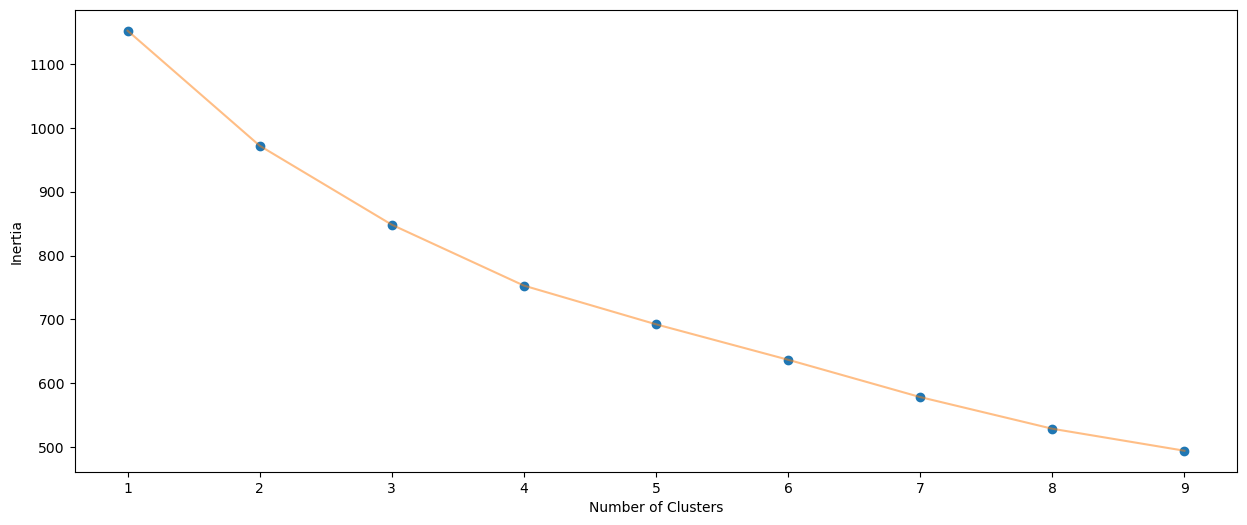

In [18]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cluster_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 10) , wcss , 'o')
plt.plot(np.arange(1 , 10) , wcss , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

## Clustering K-Means K=2

In [19]:
# df_rm = pd.concat([df_rm, cluster_scaled], axis=1)
df_final= pd.concat([cluster_scaled, grade], axis = 1)
df_final


,Year of Service,Q2 20 SC,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH,Grade_10,Grade_11,Grade_12
0,0.347578,1.453310,4.718687,0.015799,-0.747235,-1.567081,4.810747,-1.014103,0,1,0
1,0.516101,2.271548,1.671304,-2.461408,-0.110538,0.606300,2.294883,-0.337882,0,0,1
2,-0.326513,0.756007,-0.110475,1.068745,-0.747235,0.710724,2.618959,1.239967,0,1,0
3,-0.495036,0.761153,4.101951,-1.037111,0.526159,-0.834020,5.390409,-0.013860,0,0,1
4,0.179055,0.961853,-0.743567,1.462128,-0.747235,-1.811481,2.279847,0.225635,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
139,-0.157990,-0.942222,-0.878640,-0.296182,-0.747235,0.019048,-0.963660,0.563746,0,0,1
140,0.179055,-0.121411,0.687062,2.449324,-0.747235,-0.822201,-0.972266,0.225635,0,1,0
141,-1.169127,-0.145426,-0.664076,0.226996,0.526159,0.412959,-0.989020,3.212279,1,0,0
142,-1.000604,-0.867603,-1.020274,0.012526,1.162856,-0.558813,-0.998527,-1.061063,0,1,0


In [20]:
kmeans = KMeans(n_clusters=2, random_state = 42)
kmeans.fit(df_final)
mapping_dict = { 0: 'Cluster 1', 1: 'Cluster 2'}
mapped_predictions = [ mapping_dict[x] for x in kmeans.labels_]
df_rm['Cluster_KM_2']=mapped_predictions
df_rm.head()

,Index,Year of Service,Q2 20 SC,Q2_Incentive,Grade,TOTAL REV_Jul20,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH,Cluster_KM_2
0,1,9,2.4600,8.786319e+07,11,8.794014e+08,4.832649,-0.346644,0.0,0.485597,750455620.8,0.26,Cluster 2
1,2,10,3.2550,7.898679e+07,12,8.192389e+08,2.355982,-21.088729,0.5,0.712338,427931769.8,0.74,Cluster 2
2,3,5,1.7825,2.166796e+07,11,7.793109e+08,0.907896,8.469858,0.0,0.723232,469477058.6,1.86,Cluster 2
3,4,4,1.7875,1.398703e+08,12,2.084217e+09,4.331416,-9.162848,1.0,0.562074,824765897.9,0.97,Cluster 2
4,5,8,1.9825,1.440724e+07,11,6.514022e+08,0.393369,11.763723,0.0,0.460099,426004328.0,1.14,Cluster 1


In [21]:
grouped_km = df_rm[['Year of Service', 'Q2 20 SC ', 'Q2 20WM Revenue % Ach', 'Q2 20CASA Growth % Ach',
       'TOTAL NQC/NTB %Ach_Jul20', 'TOTAL Mob_Banking %Ach_Jul20', "Jul20_WM", 'Jul20_CS ACH','Cluster_KM_2']].groupby(['Cluster_KM_2']).mean().round(1)
grouped_km

,Year of Service,Q2 20 SC,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH
Cluster_KM_2,,,,,,,,
Cluster 1,7.1,0.7,0.7,-0.1,0.3,0.6,97948974.7,0.7
Cluster 2,6.5,1.7,1.6,-1.3,1.1,0.7,207597344.8,1.5


In [22]:
df_rm.columns

Index(['Index', 'Year of Service', 'Q2 20 SC ', 'Q2_Incentive', 'Grade',
       'TOTAL REV_Jul20', 'Q2 20WM Revenue % Ach', 'Q2 20CASA Growth % Ach',
       'TOTAL NQC/NTB %Ach_Jul20', 'TOTAL Mob_Banking %Ach_Jul20', 'Jul20_WM',
       'Jul20_CS ACH', 'Cluster_KM_2'],
      dtype='object')

In [44]:
def scatters(data=df_rm, h=None, pal=None):
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8,1, figsize=(10,20))
    sns.scatterplot(x='Year of Service',y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x='Q2 20WM Revenue % Ach',y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x='Q2 20CASA Growth % Ach',y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax3)
    sns.scatterplot(x='Grade',y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax4)
    sns.scatterplot(x='TOTAL REV_Jul20',y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax5)
    sns.scatterplot(x='TOTAL NQC/NTB %Ach_Jul20',y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax6)
    sns.scatterplot(x='TOTAL Mob_Banking %Ach_Jul20',y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax7)
    sns.scatterplot(x='Jul20_CS ACH',y='Q2 20 SC ', hue=h, palette=pal, data=data, ax=ax8)
    plt.tight_layout()

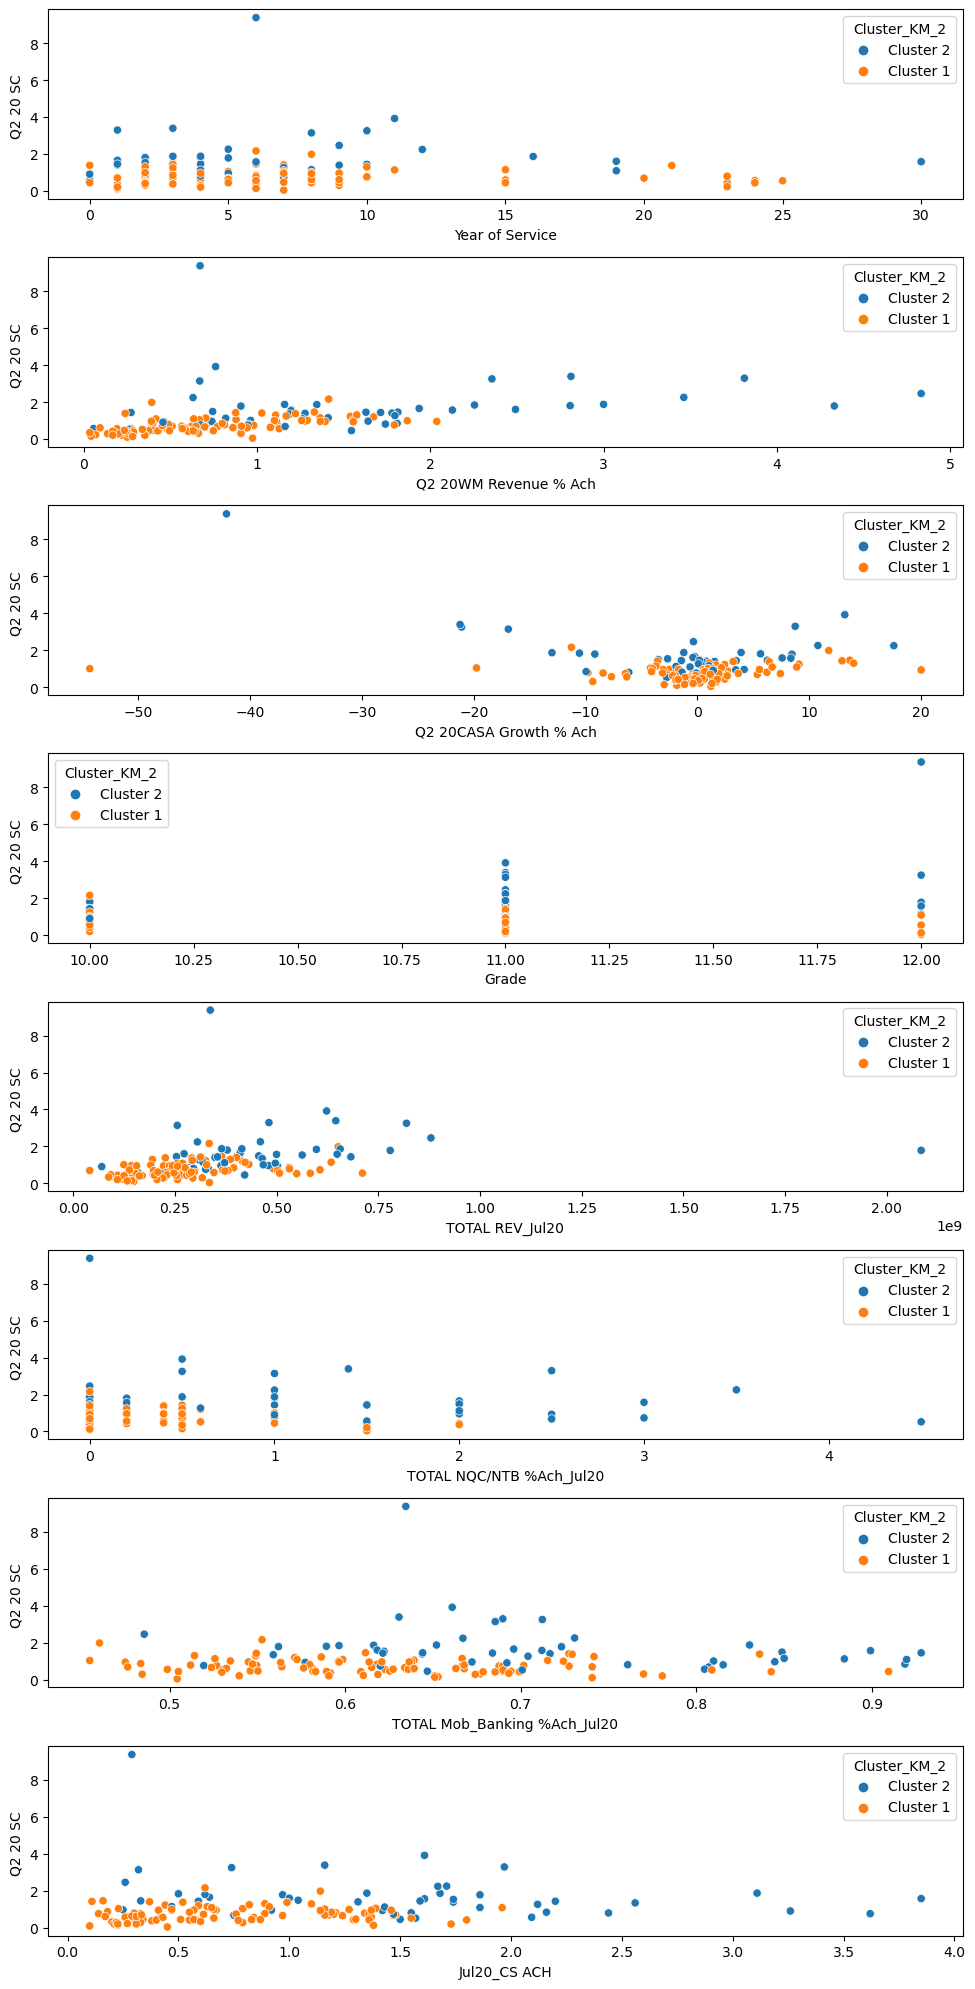

In [45]:
scatters(h = "Cluster_KM_2")

## Clustering K-Means K=4

In [46]:
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(df_final)
mapping_dict = { 0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4'}
mapped_predictions = [ mapping_dict[x] for x in kmeans.labels_]
df_rm['Cluster_KM_4']=mapped_predictions
df_rm.head()

,Index,Year of Service,Q2 20 SC,Q2_Incentive,Grade,TOTAL REV_Jul20,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH,Cluster_KM_2,Cluster_KM_4,Cluster_YJ_KM_2,Cluster_YJ_KM_4
0,1,9,2.4600,8.786319e+07,11,8.794014e+08,4.832649,-0.346644,0.0,0.485597,750455620.8,0.26,Cluster 2,Cluster 4,Cluster 2,Cluster 3
1,2,10,3.2550,7.898679e+07,12,8.192389e+08,2.355982,-21.088729,0.5,0.712338,427931769.8,0.74,Cluster 2,Cluster 4,Cluster 2,Cluster 3
2,3,5,1.7825,2.166796e+07,11,7.793109e+08,0.907896,8.469858,0.0,0.723232,469477058.6,1.86,Cluster 2,Cluster 1,Cluster 2,Cluster 4
3,4,4,1.7875,1.398703e+08,12,2.084217e+09,4.331416,-9.162848,1.0,0.562074,824765897.9,0.97,Cluster 2,Cluster 4,Cluster 2,Cluster 3
4,5,8,1.9825,1.440724e+07,11,6.514022e+08,0.393369,11.763723,0.0,0.460099,426004328.0,1.14,Cluster 1,Cluster 3,Cluster 2,Cluster 3


In [47]:
df_rm[['Year of Service', 'Q2 20 SC ', 'Q2 20WM Revenue % Ach', 'Q2 20CASA Growth % Ach',
       'TOTAL NQC/NTB %Ach_Jul20', 'TOTAL Mob_Banking %Ach_Jul20', "Jul20_WM", 'Jul20_CS ACH','Cluster_KM_4']].groupby(['Cluster_KM_4']).mean().round(1)


,Year of Service,Q2 20 SC,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH
Cluster_KM_4,,,,,,,,
Cluster 1,4.5,1.1,1.3,1.2,1.4,0.7,137156179.3,1.6
Cluster 2,19.8,1.1,0.8,3.5,0.6,0.6,140122195.9,1.1
Cluster 3,5.1,0.8,0.8,0.2,0.3,0.6,99813807.1,0.7
Cluster 4,7.0,3.0,2.2,-19.0,0.7,0.6,396256869.2,0.7


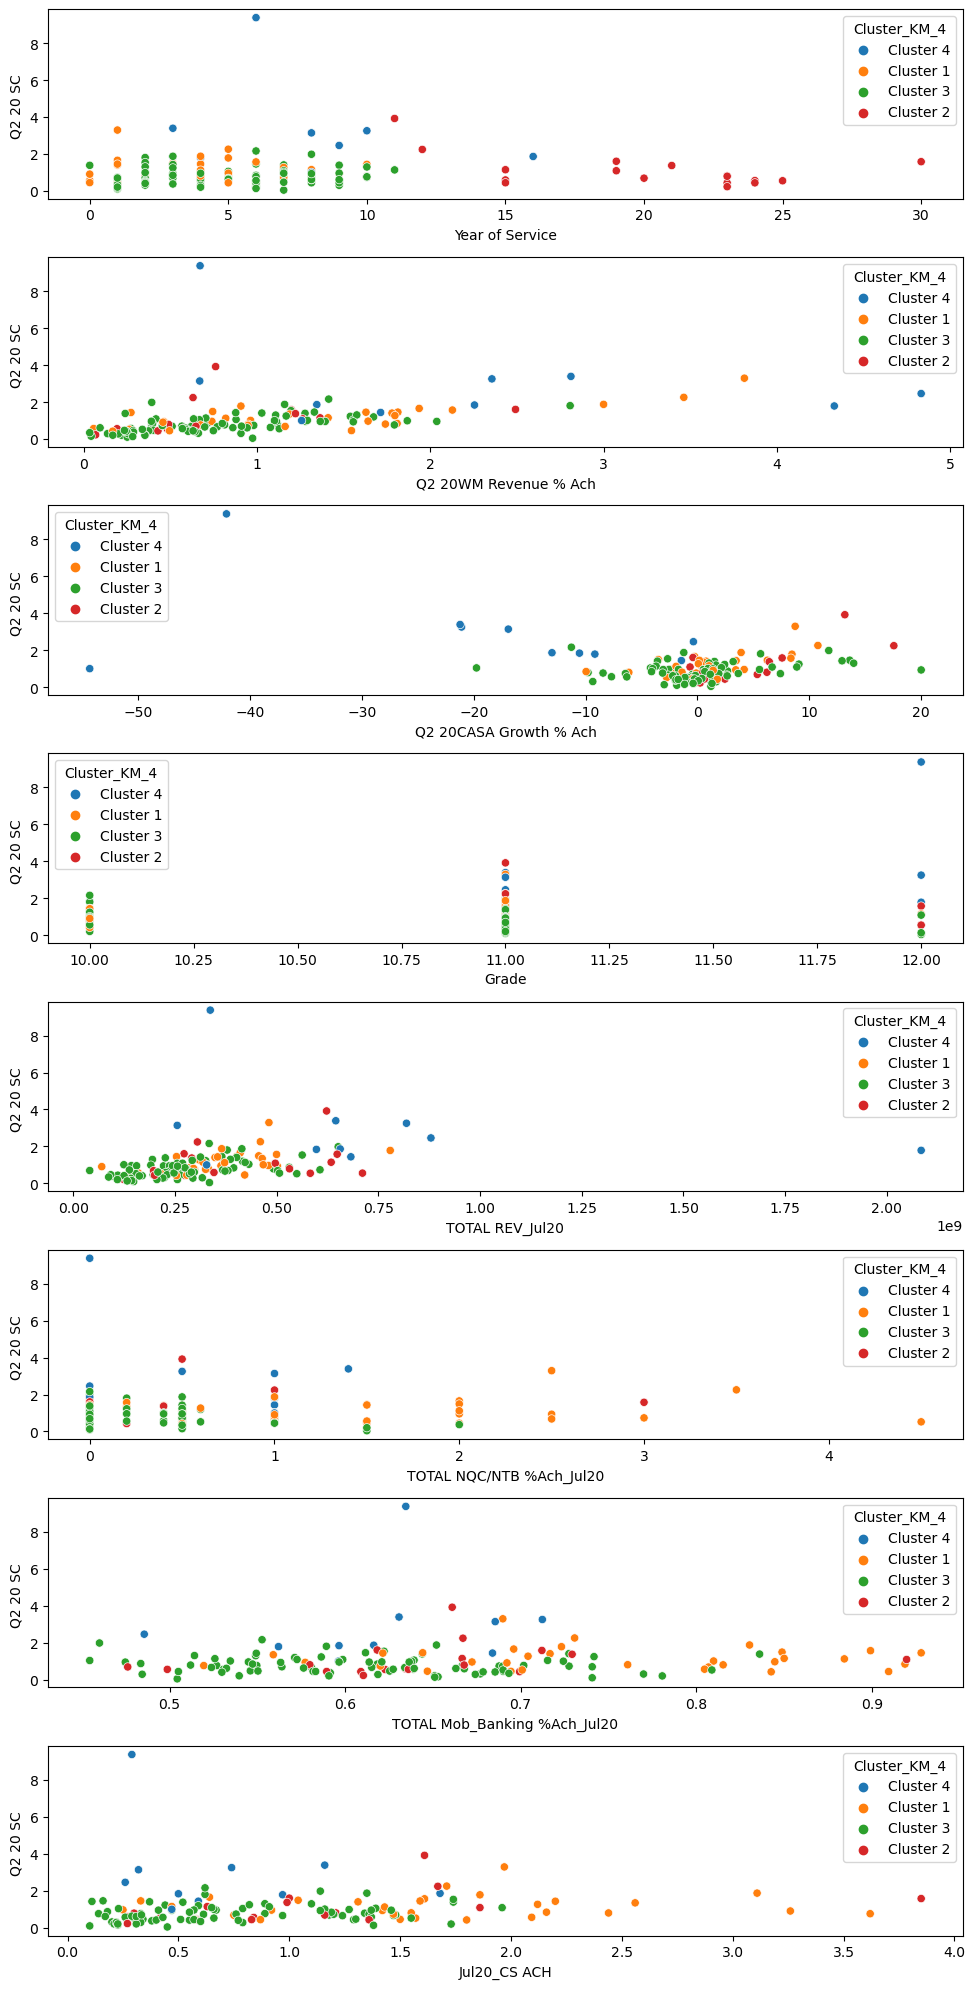

In [48]:
scatters(h = "Cluster_KM_4")

# Experiment #2: Clustering with data normalized by Yoe Johnson

## Data Preparation

In [49]:
from sklearn.preprocessing import PowerTransformer
sc=PowerTransformer()
cluster_scaled2 = pd.DataFrame(sc.fit_transform(df_new))
cluster_scaled2.columns=df_new.columns
cluster_scaled2.head()

,Year of Service,Q2 20 SC,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH
0,0.638472,1.651414,2.413452,-0.146185,-1.096047,-1.852588,2.857604,-1.311492
1,0.775836,1.999958,1.549601,-2.060504,0.354277,0.700187,1.888233,-0.123041
2,-0.072351,1.198697,0.192890,1.375661,-1.096047,0.792321,2.037591,1.265729
3,-0.316002,1.202837,2.296767,-1.051389,1.003836,-0.833378,3.036404,0.269009
4,0.488385,1.353566,-0.859925,2.039785,-1.096047,-2.238398,1.881057,0.512612


## Elbow Curve

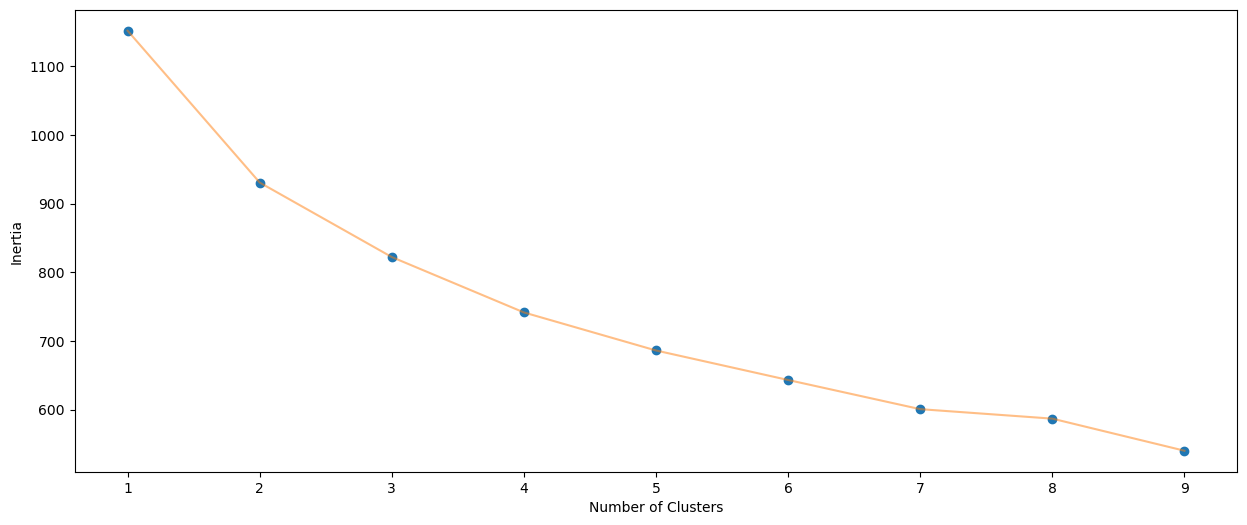

In [50]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cluster_scaled2)
    wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 10) , wcss , 'o')
plt.plot(np.arange(1 , 10) , wcss , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

## Clustering K-Means K=2

In [51]:
df_final2= pd.concat([cluster_scaled2, grade], axis = 1)
df_final2

,Year of Service,Q2 20 SC,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH,Grade_10,Grade_11,Grade_12
0,0.638472,1.651414,2.413452,-0.146185,-1.096047,-1.852588,2.857604,-1.311492,0,1,0
1,0.775836,1.999958,1.549601,-2.060504,0.354277,0.700187,1.888233,-0.123041,0,0,1
2,-0.072351,1.198697,0.192890,1.375661,-1.096047,0.792321,2.037591,1.265729,0,1,0
3,-0.316002,1.202837,2.296767,-1.051389,1.003836,-0.833378,3.036404,0.269009,0,0,1
4,0.488385,1.353566,-0.859925,2.039785,-1.096047,-2.238398,1.881057,0.512612,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
139,0.137721,-2.137474,-1.179348,-0.446891,-1.096047,0.138211,-1.761678,0.806006,0,0,1
140,0.488385,0.182189,0.968570,3.826487,-1.096047,-0.818465,-1.823147,0.512612,0,1,0
141,-2.256816,0.141698,-0.691957,0.107645,1.003836,0.523628,-1.960052,2.085806,1,0,0
142,-1.465262,-1.800833,-1.570691,-0.149685,1.363487,-0.497362,-2.051797,-1.422440,0,1,0


In [52]:
kmeans = KMeans(n_clusters=2, random_state = 42)
kmeans.fit(df_final2)
mapping_dict = { 0: 'Cluster 1', 1: 'Cluster 2'}
mapped_predictions = [ mapping_dict[x] for x in kmeans.labels_]
df_rm['Cluster_YJ_KM_2']=mapped_predictions
df_rm.head()

,Index,Year of Service,Q2 20 SC,Q2_Incentive,Grade,TOTAL REV_Jul20,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH,Cluster_KM_2,Cluster_KM_4,Cluster_YJ_KM_2,Cluster_YJ_KM_4
0,1,9,2.4600,8.786319e+07,11,8.794014e+08,4.832649,-0.346644,0.0,0.485597,750455620.8,0.26,Cluster 2,Cluster 4,Cluster 2,Cluster 3
1,2,10,3.2550,7.898679e+07,12,8.192389e+08,2.355982,-21.088729,0.5,0.712338,427931769.8,0.74,Cluster 2,Cluster 4,Cluster 2,Cluster 3
2,3,5,1.7825,2.166796e+07,11,7.793109e+08,0.907896,8.469858,0.0,0.723232,469477058.6,1.86,Cluster 2,Cluster 1,Cluster 2,Cluster 4
3,4,4,1.7875,1.398703e+08,12,2.084217e+09,4.331416,-9.162848,1.0,0.562074,824765897.9,0.97,Cluster 2,Cluster 4,Cluster 2,Cluster 3
4,5,8,1.9825,1.440724e+07,11,6.514022e+08,0.393369,11.763723,0.0,0.460099,426004328.0,1.14,Cluster 1,Cluster 3,Cluster 2,Cluster 3


In [53]:
df_rm[['Year of Service', 'Q2 20 SC ', 'Q2 20WM Revenue % Ach', 'Q2 20CASA Growth % Ach',
       'TOTAL NQC/NTB %Ach_Jul20', 'TOTAL Mob_Banking %Ach_Jul20', "Jul20_WM", 'Jul20_CS ACH','Cluster_YJ_KM_2']].groupby(['Cluster_YJ_KM_2']).mean().round(1)


,Year of Service,Q2 20 SC,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH
Cluster_YJ_KM_2,,,,,,,,
Cluster 1,6.4,0.5,0.5,0.4,0.5,0.6,56543533.6,0.7
Cluster 2,7.4,1.4,1.4,-1.1,0.7,0.7,192102764.2,1.2


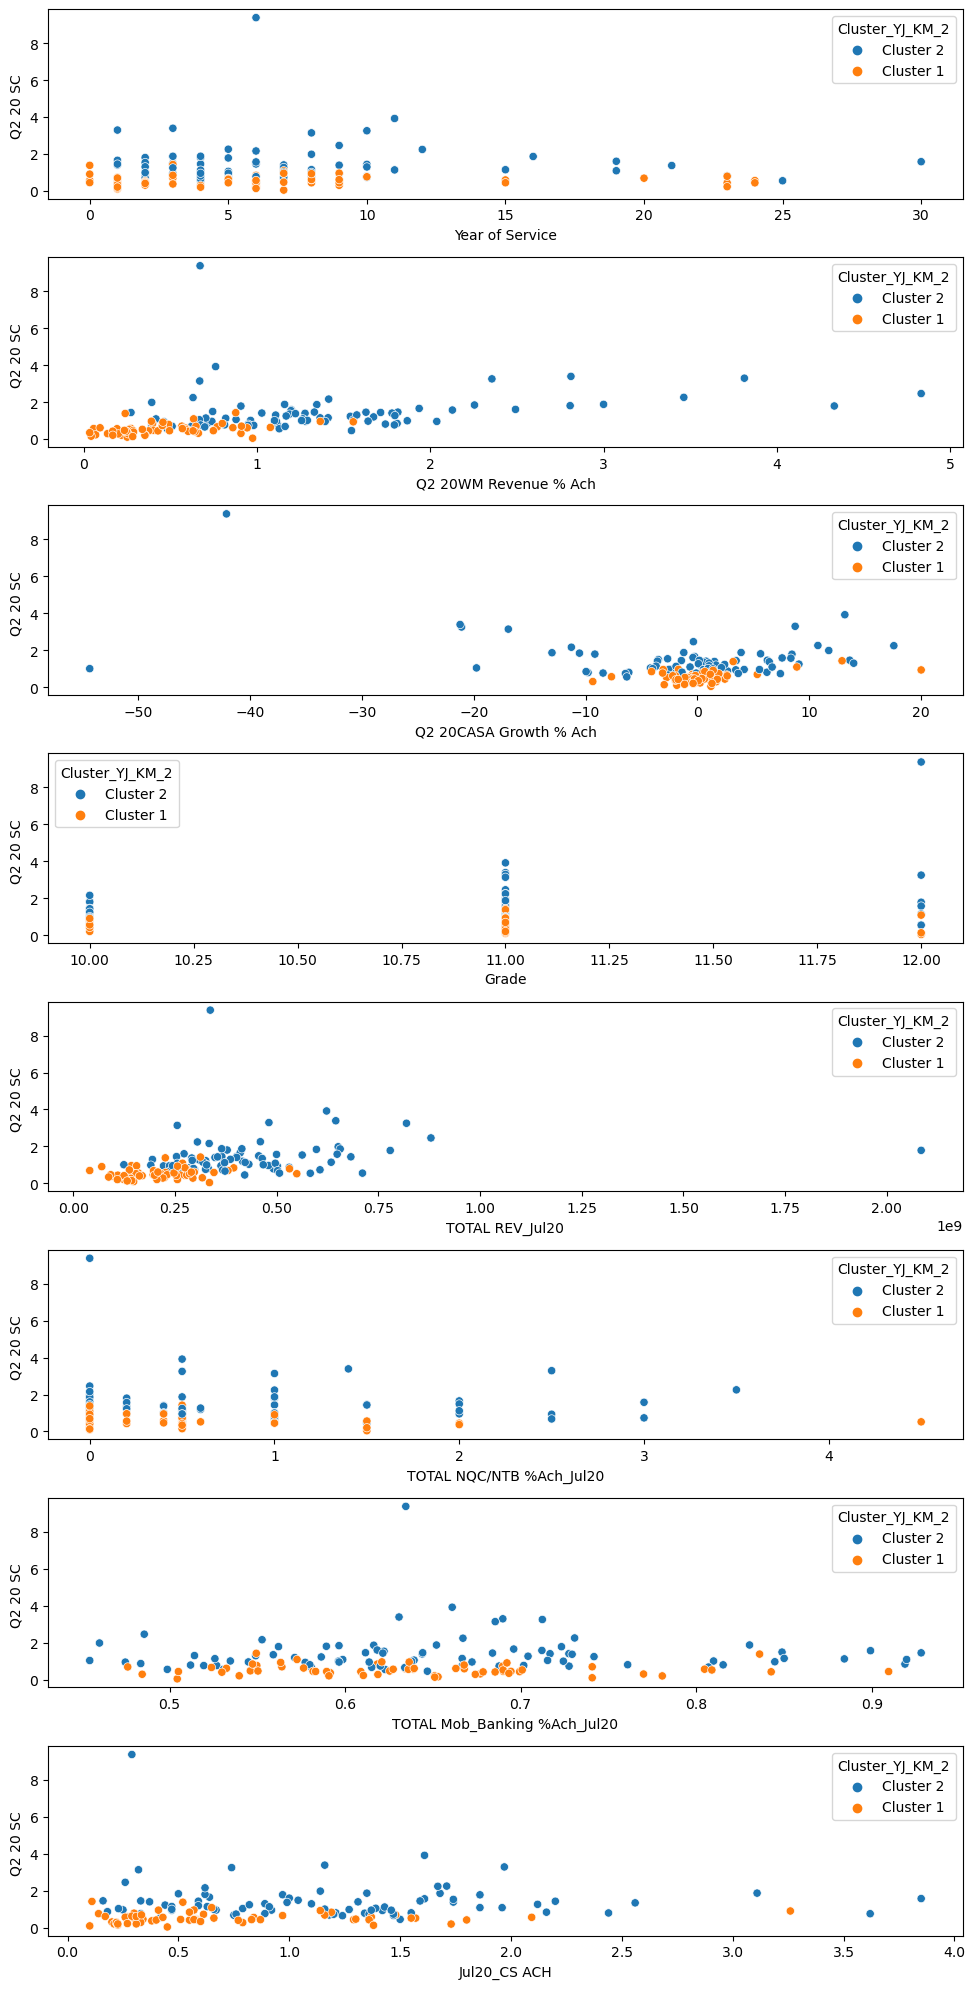

In [54]:
scatters(h = "Cluster_YJ_KM_2")

## Clustering K-Means K=4

In [55]:
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(df_final2)
mapping_dict = { 0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4'}
mapped_predictions = [ mapping_dict[x] for x in kmeans.labels_]
df_rm['Cluster_YJ_KM_4']=mapped_predictions
df_rm.head()

,Index,Year of Service,Q2 20 SC,Q2_Incentive,Grade,TOTAL REV_Jul20,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH,Cluster_KM_2,Cluster_KM_4,Cluster_YJ_KM_2,Cluster_YJ_KM_4
0,1,9,2.4600,8.786319e+07,11,8.794014e+08,4.832649,-0.346644,0.0,0.485597,750455620.8,0.26,Cluster 2,Cluster 4,Cluster 2,Cluster 3
1,2,10,3.2550,7.898679e+07,12,8.192389e+08,2.355982,-21.088729,0.5,0.712338,427931769.8,0.74,Cluster 2,Cluster 4,Cluster 2,Cluster 3
2,3,5,1.7825,2.166796e+07,11,7.793109e+08,0.907896,8.469858,0.0,0.723232,469477058.6,1.86,Cluster 2,Cluster 1,Cluster 2,Cluster 4
3,4,4,1.7875,1.398703e+08,12,2.084217e+09,4.331416,-9.162848,1.0,0.562074,824765897.9,0.97,Cluster 2,Cluster 4,Cluster 2,Cluster 3
4,5,8,1.9825,1.440724e+07,11,6.514022e+08,0.393369,11.763723,0.0,0.460099,426004328.0,1.14,Cluster 1,Cluster 3,Cluster 2,Cluster 3


In [56]:
df_rm[['Year of Service', 'Q2 20 SC ', 'Q2 20WM Revenue % Ach', 'Q2 20CASA Growth % Ach',
       'TOTAL NQC/NTB %Ach_Jul20', 'TOTAL Mob_Banking %Ach_Jul20', "Jul20_WM", 'Jul20_CS ACH','Cluster_YJ_KM_4']].groupby(['Cluster_YJ_KM_4']).mean().round(1)


,Year of Service,Q2 20 SC,Q2 20WM Revenue % Ach,Q2 20CASA Growth % Ach,TOTAL NQC/NTB %Ach_Jul20,TOTAL Mob_Banking %Ach_Jul20,Jul20_WM,Jul20_CS ACH
Cluster_YJ_KM_4,,,,,,,,
Cluster 1,1.9,0.4,0.4,0.1,0.8,0.7,48519112.2,0.8
Cluster 2,10.7,0.7,0.6,1.3,0.2,0.6,84422959.6,0.7
Cluster 3,6.8,1.7,1.6,-6.5,0.3,0.6,254167837.4,0.8
Cluster 4,6.6,1.3,1.4,2.7,1.1,0.7,141408658.9,1.6


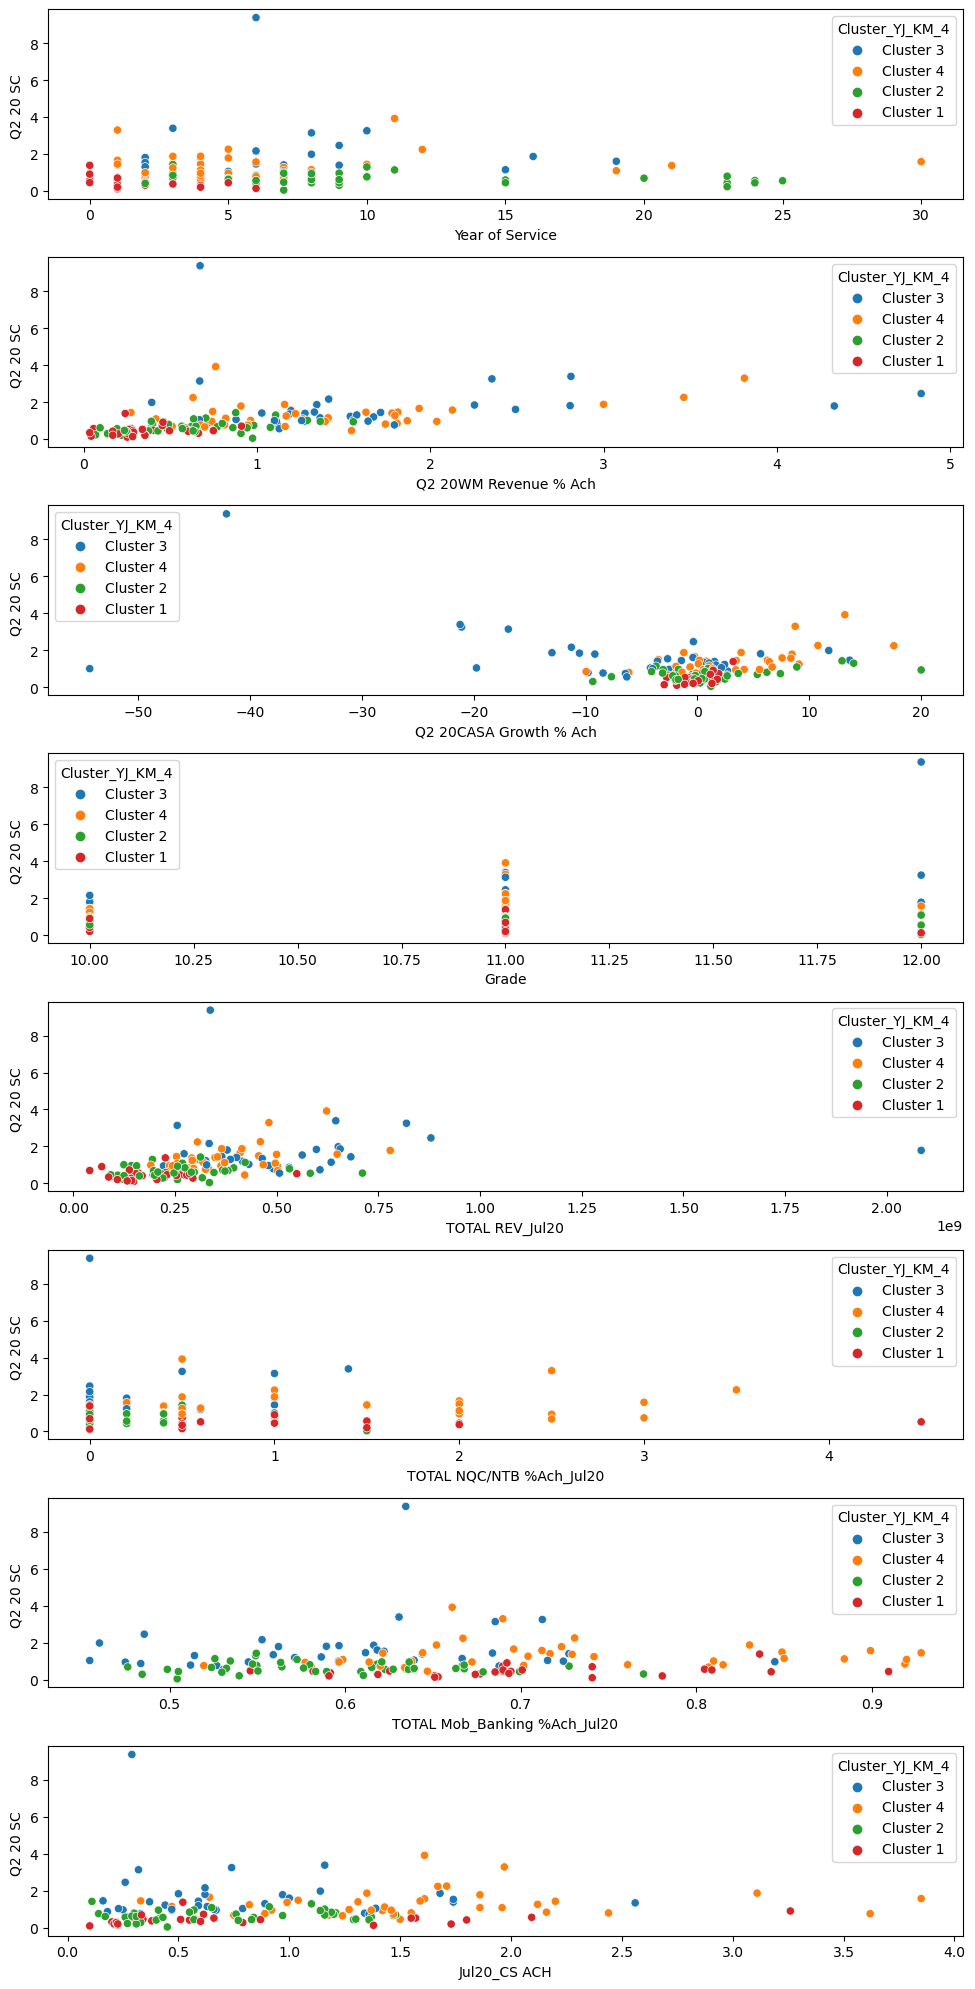

In [57]:
scatters(h = "Cluster_YJ_KM_4")

# Summary

In [61]:
df_rm['Cluster_YJ_KM_2'].value_counts()

Cluster 2    82
Cluster 1    62
Name: Cluster_YJ_KM_2, dtype: int64

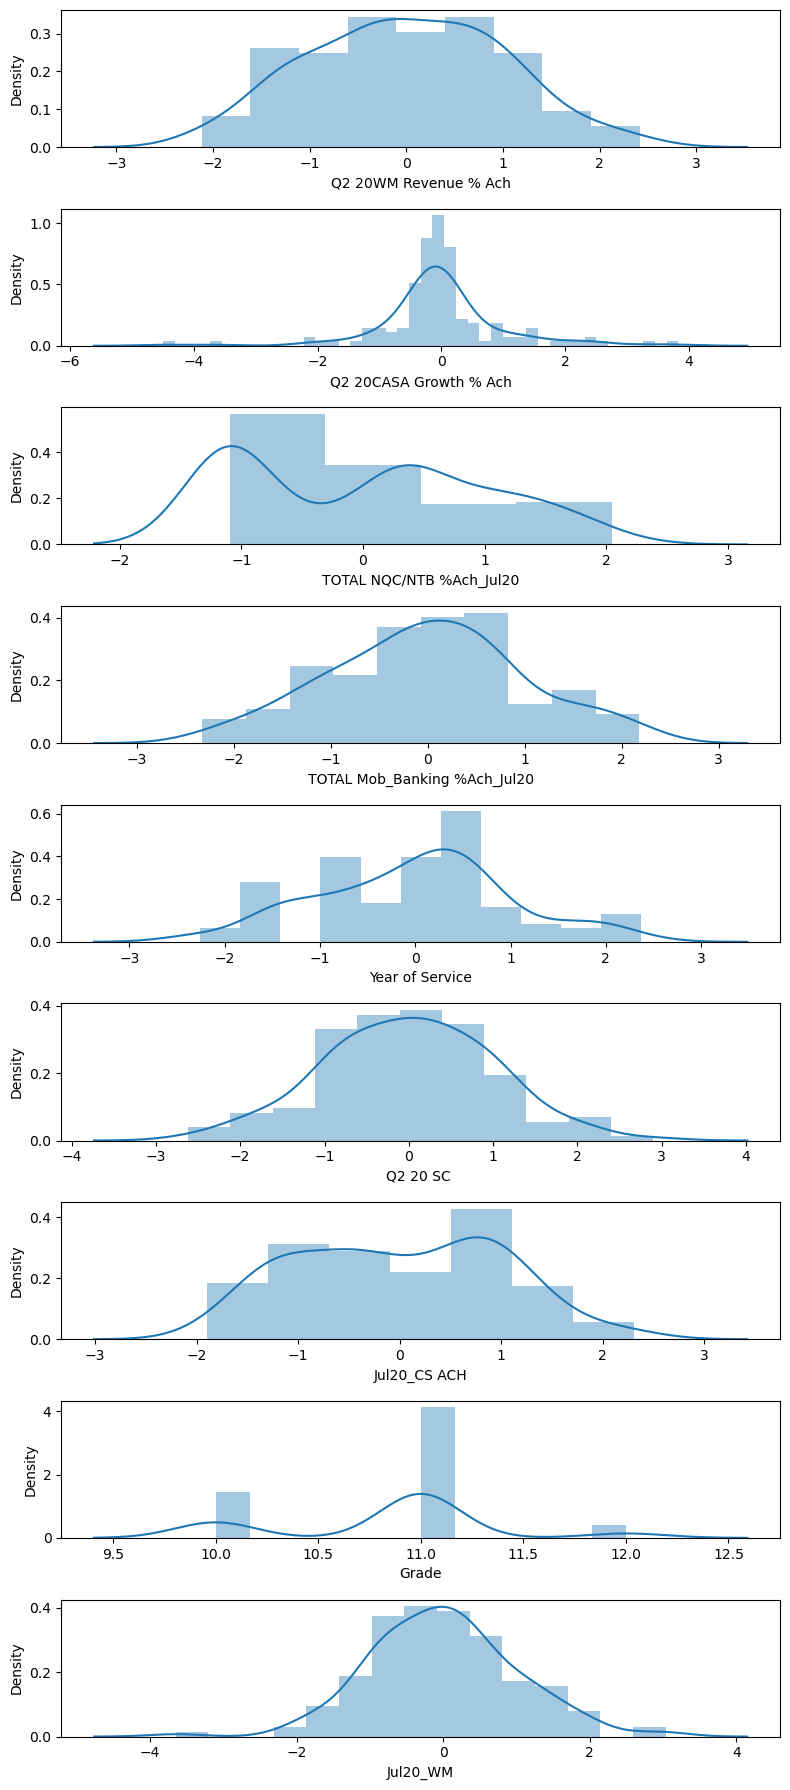

In [63]:
df_final2_dist = pd.concat([cluster_scaled2,df_rm[['Grade']]],axis = 1)
distributions(df_final2_dist)

EDA:
1. Data yang dianalisa berjumlah 114 
2. Variabel yang akan digunakan dalam analisis clustering dengan metode K-Means adalah Score Card, Grade RM, WM Revenue, CASA Growth, NQC/NTB, Mobile Banking, WM Balance, dan Cross Selling

Deskriptif:
1. Distribusi data variabel 'year of service' , 'WM Balance' , 'Score Card', 'WM Revenue' , 'NQC', dan 'Cross Selling' memiliki distribusi positif skew (ke kanan)
2. Distribusi data variabel 'CASA Growth' memiliki distribusi negatif skew (kekiri)
3. Distribusi data variabel 'Mobile banking' cenderung normal
4. Akan dilakukan normalisasi data menggunakan metode yoe-johnson

Experiment 1 - Scaler only:
1. Berdasarkan elbow curve, pemilikah cluster optimal tidak dapat ditentukan sehingga akan dilihat pada K=2 dan K=4
2. Hasil analisis menggunkan K=2 adalah variabel dapat mengelompok secara jelas untuk semua variabelnya
3. Hasil analisis menggunkan K=4 adalah variabel tidak dapat mengelompok secara jelas untuk semua variabelnya

Experiment 2 - Yoe-Johnson:
1. Berdasarkan elbow curve, pemilikah cluster optimal tidak dapat ditentukan sehingga akan dilihat pada K=2 dan K=4
2. Hasil analisis menggunkan K=2 adalah variabel dapat mengelompok secara jelas untuk semua variabelnya
3. Hasil analisis menggunkan K=4 adalah variabel tidak dapat mengelompok secara jelas untuk semua variabelnya

Kesimpulan AKhir:
1. Analisa clustering lebih baik diggunakan menggunakan standard scale Yoe-Johnson karena persebaran data pada scatter plot terlihat lebih jelas
2. Berdasarkan analisis menggunakan  K=2, terlihat karakteristik kedua cluster tersebut, dimana:
    Cluster 1 = Memiliki hasil MR Scorecard lebih rendah dan hanya terfokus pada produk CASA, namun tidak lebih baik 
                dibandingkan dengan cluster 2
    Cluster 2 = RM lebih baik dalam mengelola dan mencari revenue produk WM, Akuisisi customer NQC lebih banyak, dan memiliki
                hasil RM Scorecard yang lebih tinggi dibandingkan dengan Cluster 1
3. Rangkuman Deskriptif akhir:
    Cluster 1 = 62 RM
    CLuster 2 = 82 RM